# Prepare logbook

import statement necessary to get the logbook up and running

In [13]:
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

In [2]:
import os, os.path

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [4]:
from skimage import exposure
import skimage
import numpy as np

In [5]:
from PyQt4 import QtGui

## Select the working folder

For this analysis, the sequence of runs that belongs to each sample have been placed in 3 different folders 
(Sample1, Sample2 and Sample3). 

--> **First you will need to select the sample you want to work with.**

In [23]:
input_folder = widgets.Dropdown(options = ['Sample1','Sample1_cropped','Sample2','Sample3'], 
                     value='Sample1', 
                     description='Choose your sample folder')
display(input_folder)

This specify where the data folder sits relative to the code folder

In [35]:
data_folder = '../data_11744/' + input_folder.value
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)
print('number of files: %d' %number_of_files)
print('does first file (%s) exist: %s' %(list_of_files[0], os.path.isfile(os.path.join(data_folder, list_of_files[0]))))

number of files: 68
does first file (Sample10000.tif) exist: True


In [36]:
# define size of images
image0 = mpimg.imread(os.path.join(data_folder, list_of_files[0]))
height, width = image0.shape

# Trying to remove all the pixels that have an intensity below a given value

In [37]:
threshold_value = widgets.Text(description = 'Threshold value to keep',
                                value = '30000')
display(threshold_value)

In [38]:
# calculate the new images
max_intensity = float(threshold_value.value)
image_new_array = []
for _file in list_of_files:
    image_new = mpimg.imread(os.path.join(data_folder, _file))
            
    index_to_remove = (image_new < max_intensity)
    image_new[index_to_remove] = 0
    
    image_new_array.append(image_new)
    

<function __main__.plot_image>

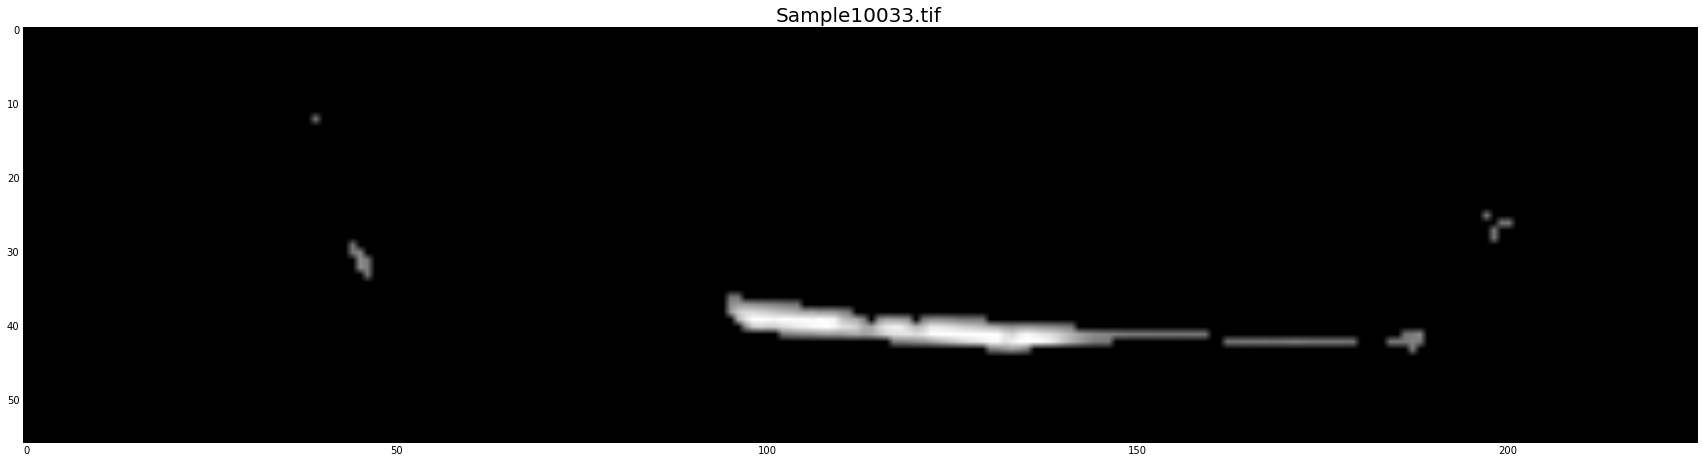

In [39]:
# visualize the new images
def plot_image(n):
    image = image_new_array[n]

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(111)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)

interact(plot_image, n=(0, number_of_files-1, 1))

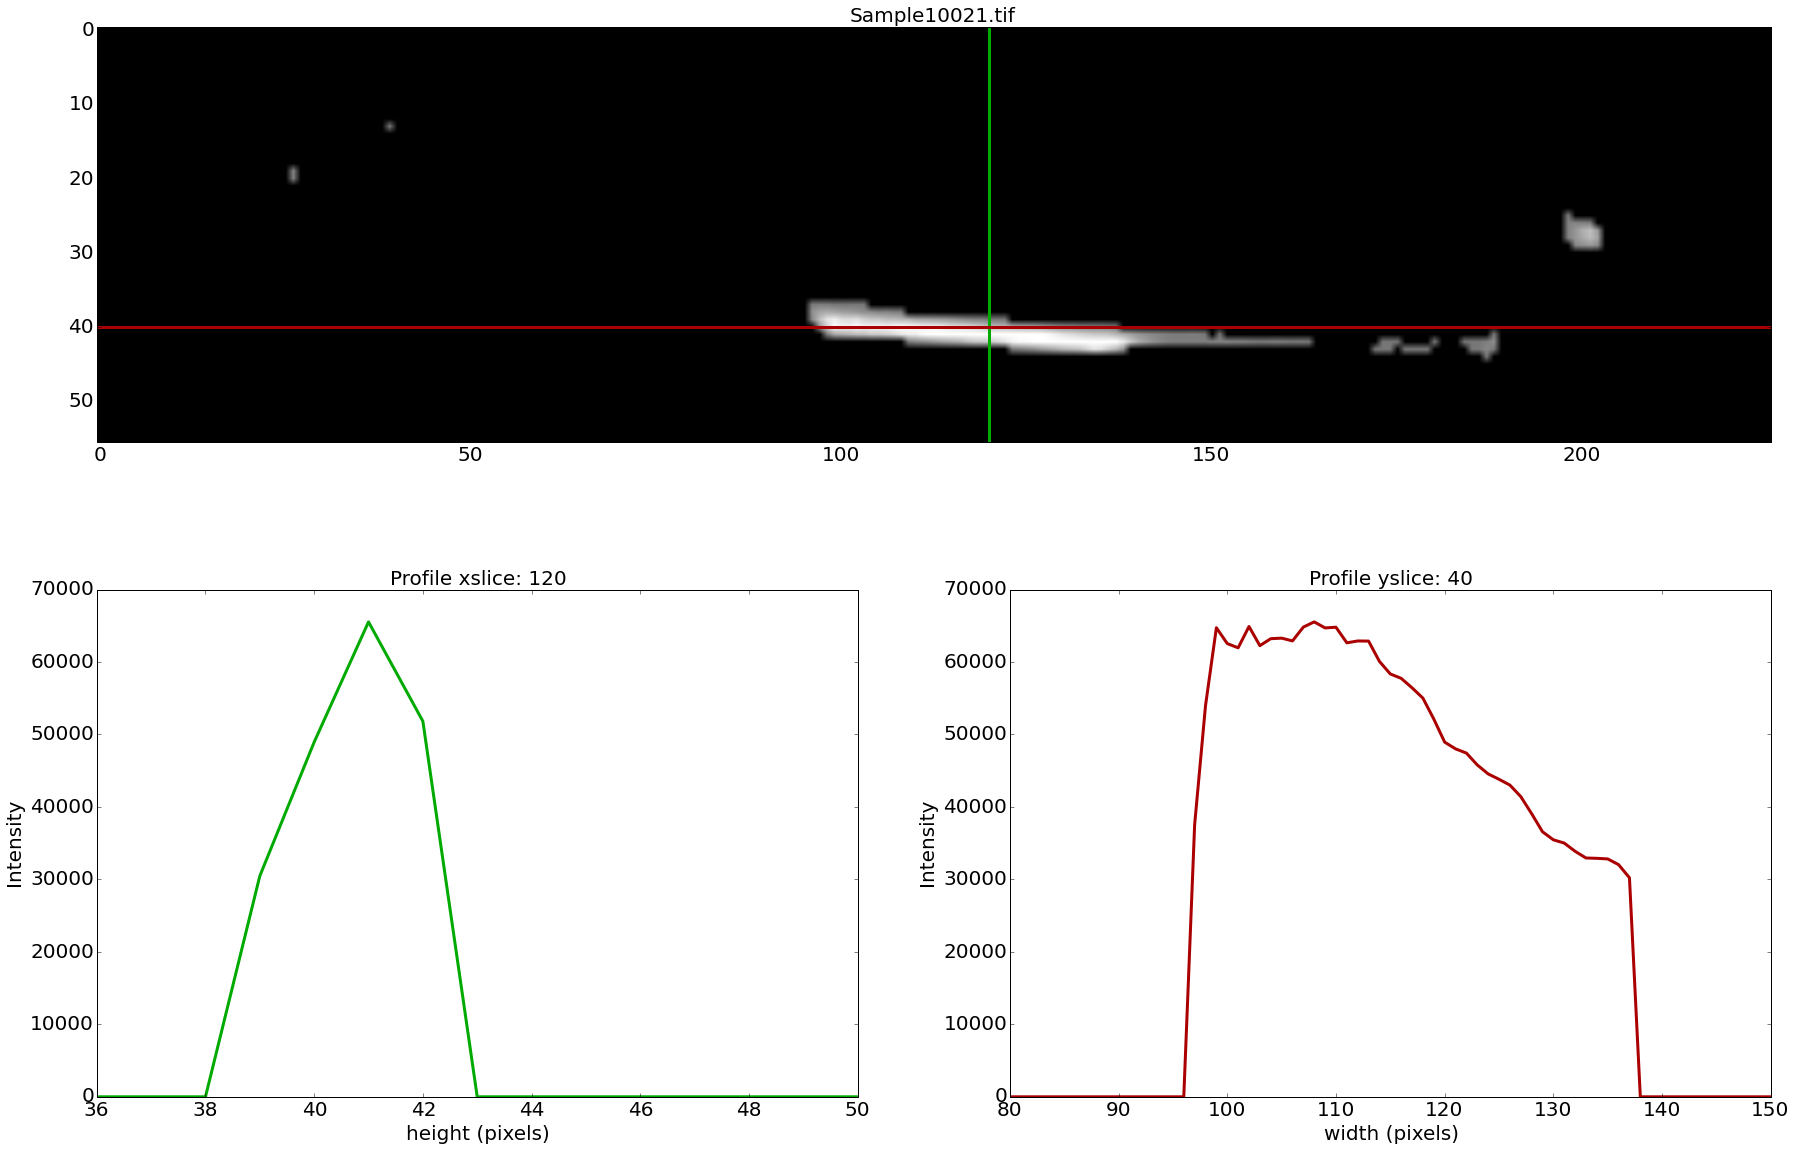

In [65]:
def plot_image(file_index, xslice, yslice, xmin, xmax, ymin, ymax):
    image = image_new_array[file_index]

    fig = plt.figure(figsize=(30,20))
    ax_img = plt.subplot2grid((2,2), (0,0), colspan=2)
    ax_profile_x = plt.subplot(223)
    ax_profile_y = plt.subplot(224)
    
    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[file_index], fontsize=20)
    ax_img.axvline(xslice, color="#00aa00", linewidth=3)
    ax_img.axhline(yslice, color="#aa0000", linewidth=3)

    # profile_x
    y_axis = range(height)
    image_x1 = image[:, xslice]

    ax_profile_x.plot(y_axis, image_x1, color="#00aa00", linewidth=3)
    x_title = "Profile xslice: %d" %(xslice)
    ax_profile_x.set_title(x_title, fontsize=20)
    ax_profile_x.set_xlim(xmin, xmax)
    ax_profile_x.set_xlabel('height (pixels)', fontsize=20)
    ax_profile_x.set_ylabel('Intensity', fontsize=20)

    # profile_y
    x_axis = range(width)
    image_y1 = image[yslice, :]

    ax_profile_y.plot(x_axis, image_y1, color="#aa0000", linewidth=3)
    y_title = "Profile yslice: %d" %(yslice)
    ax_profile_y.set_title(y_title, fontsize=20)
    ax_profile_y.set_xlim(ymin, ymax)
    ax_profile_y.set_xlabel('width (pixels)', fontsize=20)
    ax_profile_y.set_ylabel('Intensity', fontsize=20)

interact(plot_image, file_index = (0, number_of_files-1, 1), 
         xslice = widgets.IntSlider(min=0, max=width, step=1, value=120),
         yslice = widgets.IntSlider(min=0, max=height, step=1, value=40),
         xmin = widgets.IntSlider(min=0, max=height, step=1, value=30),
         xmax = widgets.IntSlider(min=0, max=height, step=1, value=50),
         ymin = widgets.IntSlider(min=0, max=width, step=1, value=80),
         ymax = widgets.IntSlider(min=0, max=width, step=1, value=150))
         
